# House Sales Prices Prediction
---

## Overview

- **Data Source**
    - From Kaggle competition: [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)
- **Goal**
    - Predicting the sales price for each house
- **Evaluation Metric**
    - Evaluated on [Root-Mean-Squared-Error (RMSE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation)
- **Target**
    - SalePrice

## Load libs

In [1]:
import numpy as np
import pandas as pd

import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (30, 10),
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large'
}

sn.set_style('whitegrid')
sn.set_context('talk')

plt.rcParams.update(params)

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.base import clone, BaseEstimator, RegressorMixin

from ml_utilities import ml_utilities

import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)
---

### EDA Summary

- We have two datasets: train & test. The train for training model, and test for predicting the prices of house.
- Data description
    + Train set has 81 attributes and 1460 records in total.
    + Test set has 80 attributes and 1459 records in total.
- Both of dataset have many type variables both of numerical (int64 or float64) and categorical (object) variables. These will need to handled with the transforming.
- Data have a lot of NaN values. Consider to deal with missing values.
- The target need to log1p to increase the performance.
- There are a lot of features need to featuring. Will consider to deep dive and select the important features.

### Summarize data

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [3]:
print('Train data shape', train.shape)
print('Test data shape', test.shape)

Train data shape (1460, 81)
Test data shape (1459, 80)


### Peek of the data

In [4]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


### Describe data

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Data types

In [7]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


The Train dataset has:
+ 81 attributes in total and 1460 records
+ Dataset has many type variables both of numerical (int or float) and categorical variables. These will need to handled with categorical attributes.

### Missing values

In [8]:
ml_utilities.generate_preview(train)

,index,dtypes,first_value,null_count,null_ratio
0,Id,int64,1,0,0.000000
1,MSSubClass,int64,60,0,0.000000
2,MSZoning,object,RL,0,0.000000
3,LotFrontage,float64,65,259,17.739726
4,LotArea,int64,8450,0,0.000000
5,Street,object,Pave,0,0.000000
6,Alley,object,NaN,1369,93.767123
7,LotShape,object,Reg,0,0.000000
8,LandContour,object,Lvl,0,0.000000
9,Utilities,object,AllPub,0,0.000000


Text(0.5,1,'Percent missing data by feature')

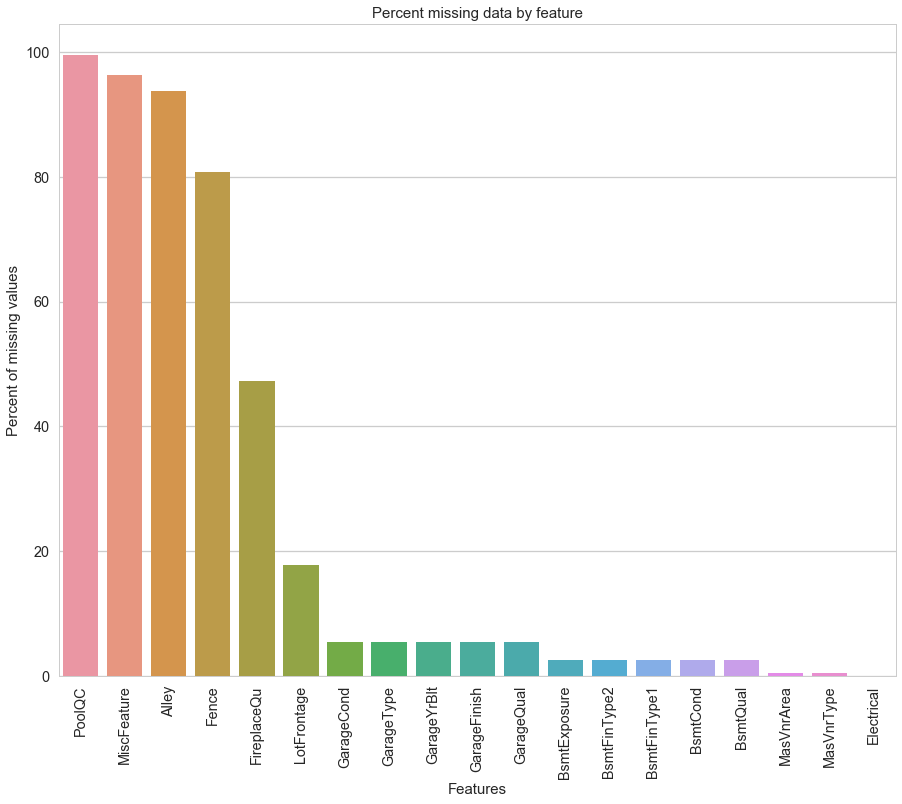

In [9]:
total_missing = train.isnull().sum().sort_values(ascending=False)
ratio_missing = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, ratio_missing], axis=1, keys=['Total', 'Ratio'])
missing_data['Type'] = train[missing_data.index].dtypes

missing_data = missing_data[(missing_data['Total'] > 0)]

# display missing data
missing_data

# Visualize missing data
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sn.barplot(x=missing_data.index, y=missing_data['Ratio']*100.0)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

### Distribution visualization

In [10]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Visualizing the SalePrice distribution of train dataset

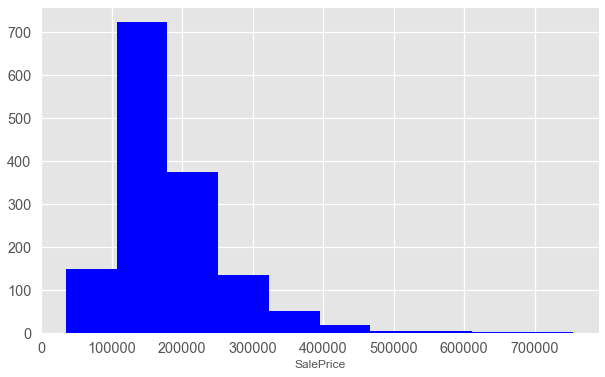

In [11]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
plt.hist(train['SalePrice'], color='blue')
plt.xlabel('SalePrice')
plt.show()

Visualizing the SalePrice distribution of train dataset after skewed SalePrice

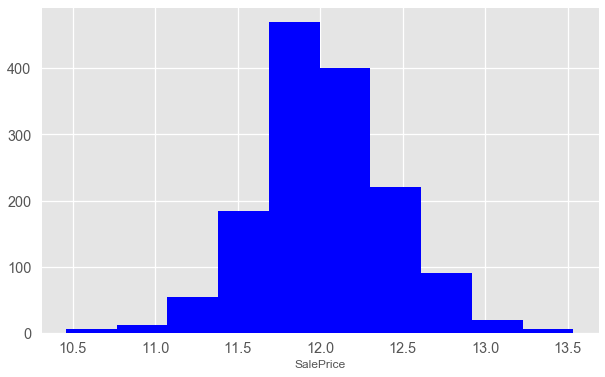

In [12]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
plt.hist(np.log1p(train['SalePrice']), color='blue')
plt.xlabel('SalePrice')
plt.show()

### Correlation Distribution

**Headmap plotting**

Matrix heatmap help to indentify correlation between the target and other features

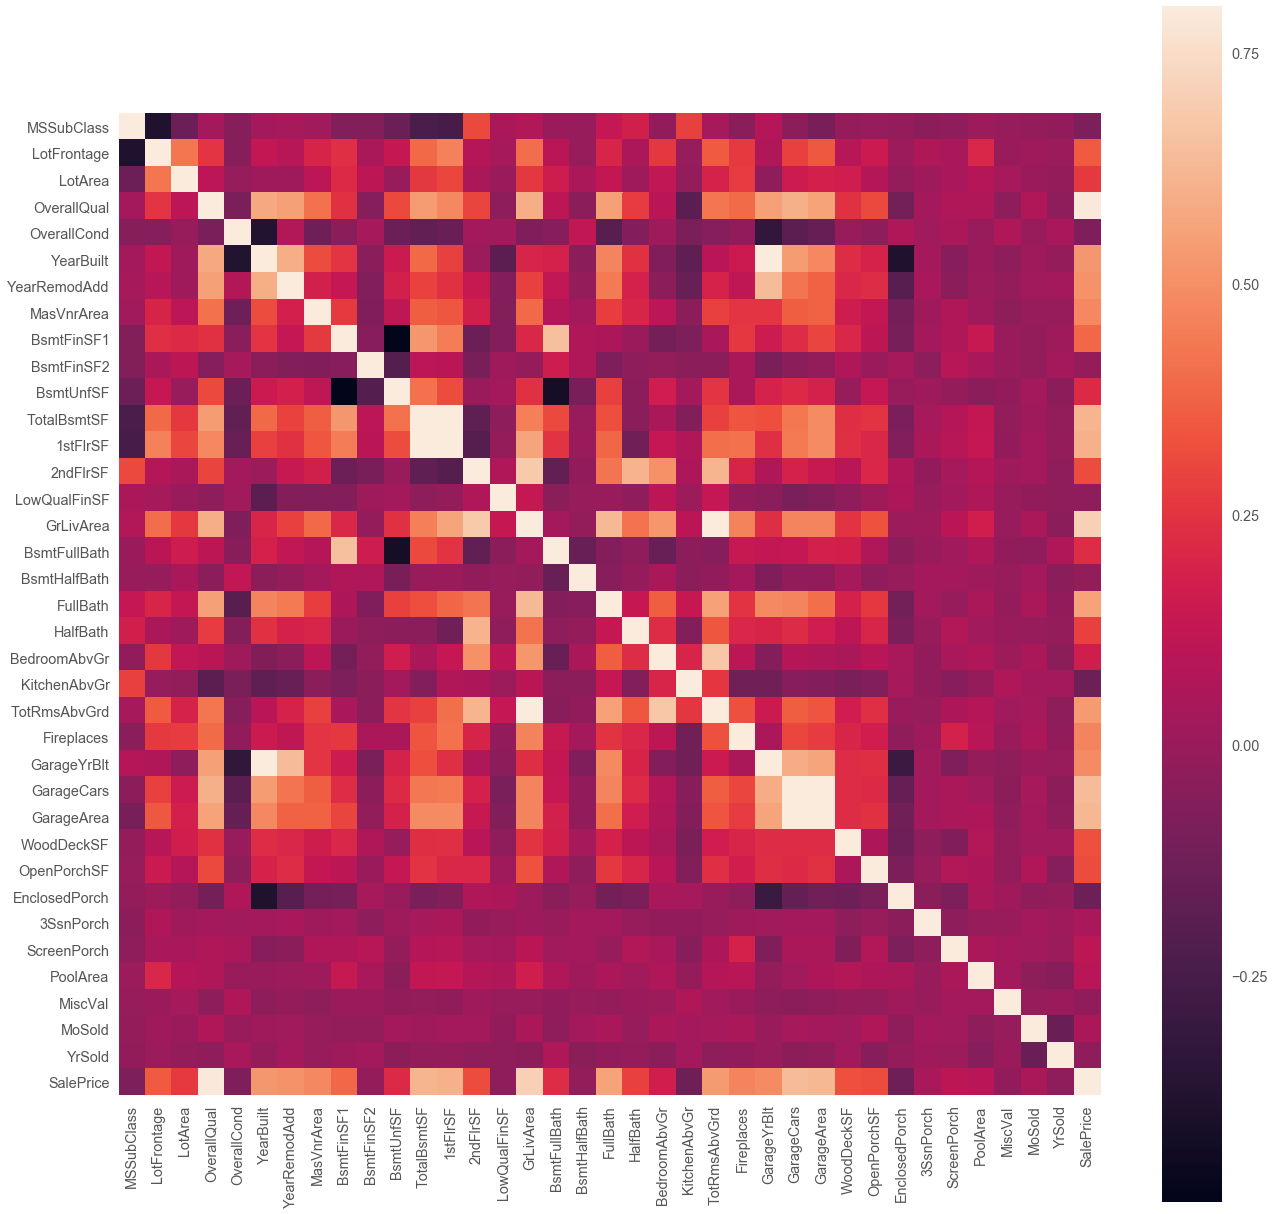

In [13]:
corr = train.select_dtypes(include=['float64', 'int64']).iloc[:,1:].corr()
f, ax = plt.subplots(figsize=(22, 22))
sn.heatmap(corr, vmax=.8, square=True)

**Scatter plotting**

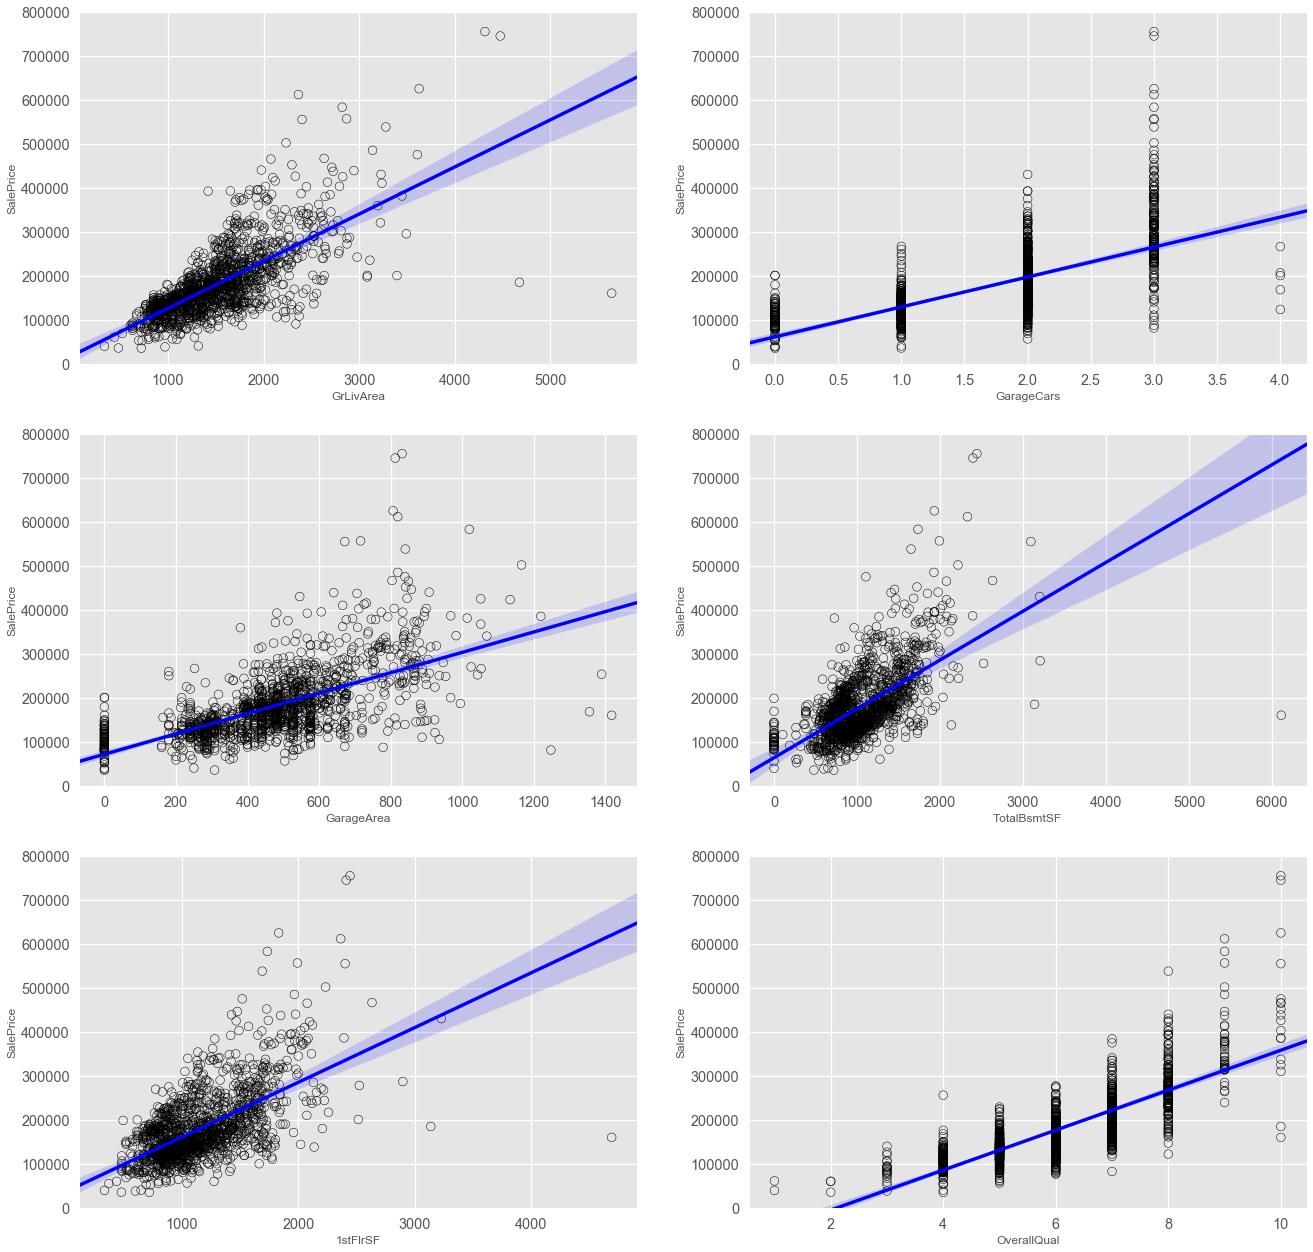

In [14]:
# Scatter plotting the top 6 positive related to SalePrice
plt.figure(figsize=(22, 22))
k = 6

# Correlation between attributes with SalePrice
corr_list = corr['SalePrice'].sort_values(axis=0, ascending=False).iloc[1:]

for i in range(k):
    ii = '32'+str(i)
    plt.subplot(ii)
    feature = corr_list.index.values[i]
    plt.scatter(train[feature], train['SalePrice'], facecolors='none', edgecolors='k', s=75)
    sn.regplot(x=feature, y='SalePrice', data=train, scatter=False, color='b')
    ax=plt.gca()
    ax.set_ylim([0,800000])

**Box plotting**

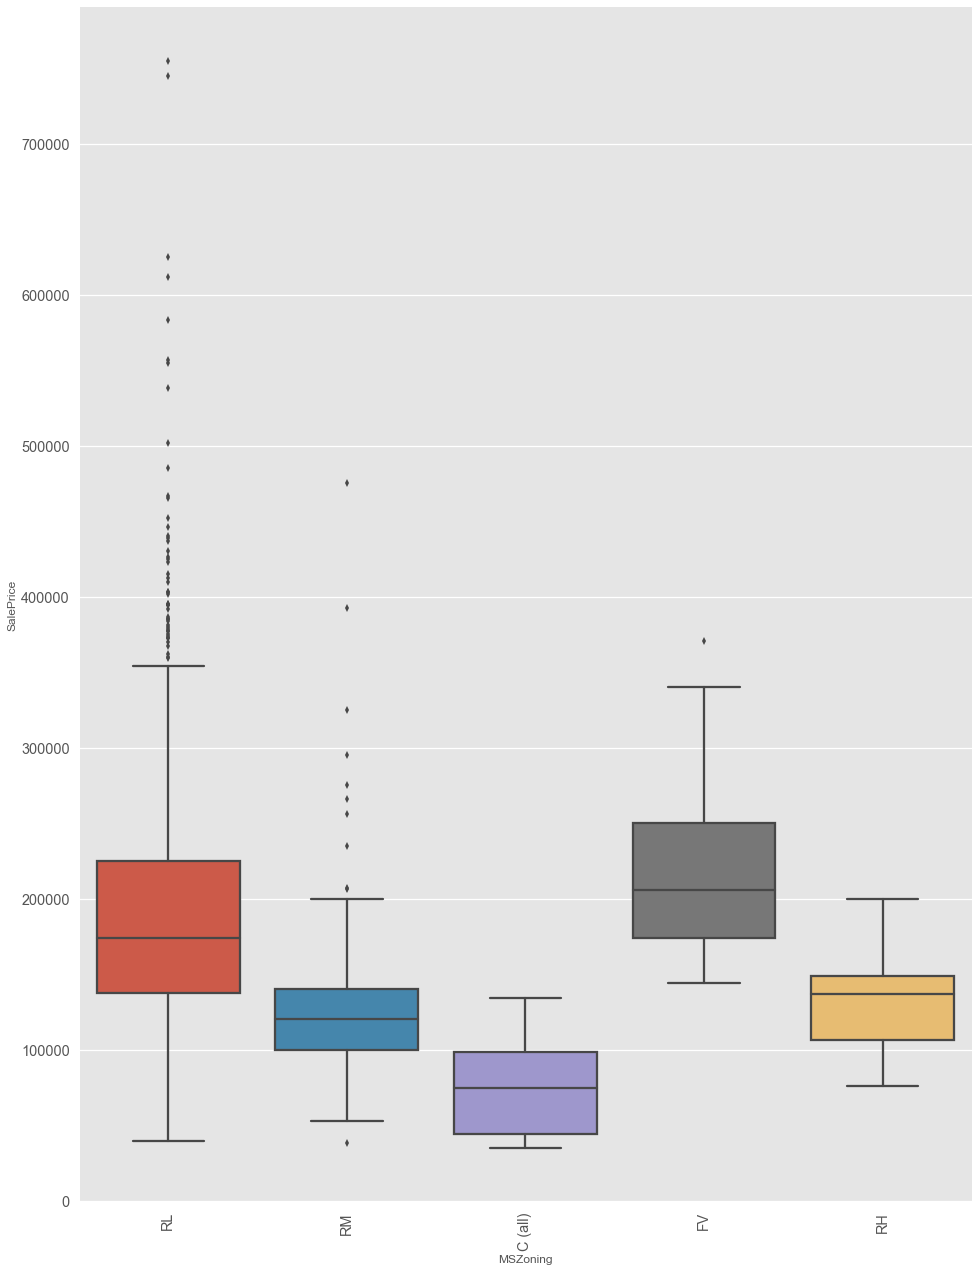

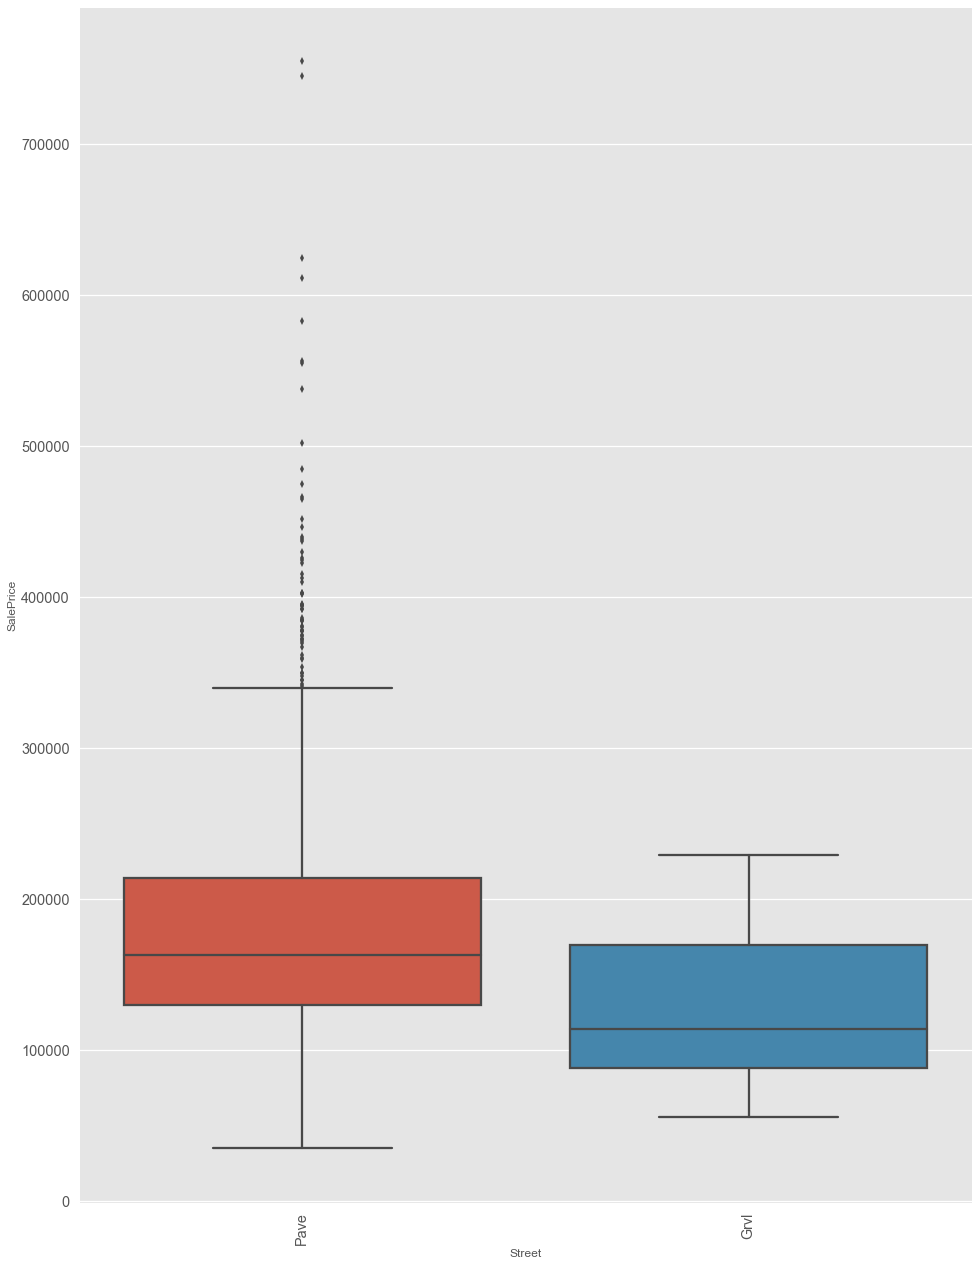

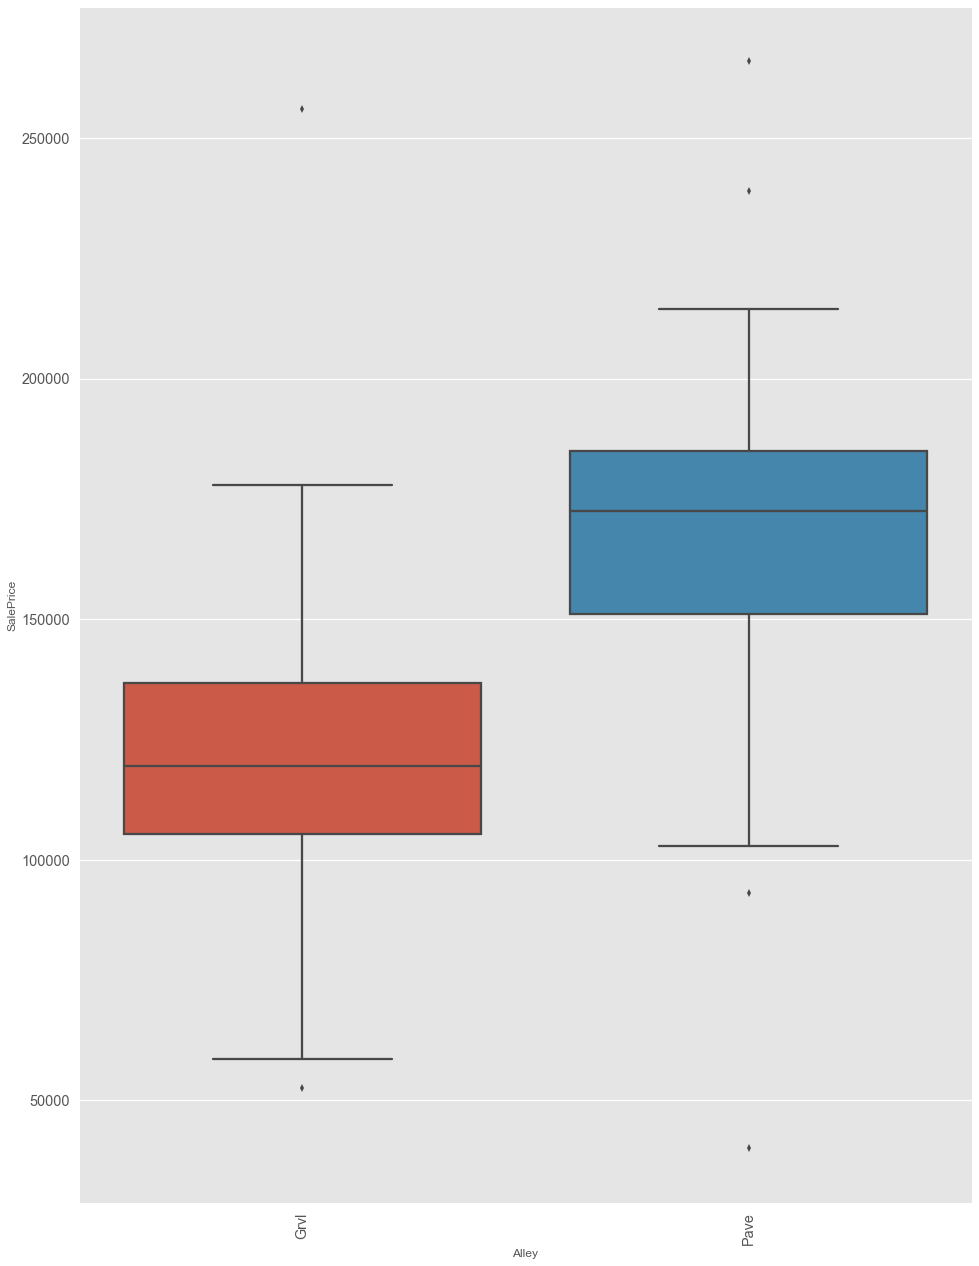

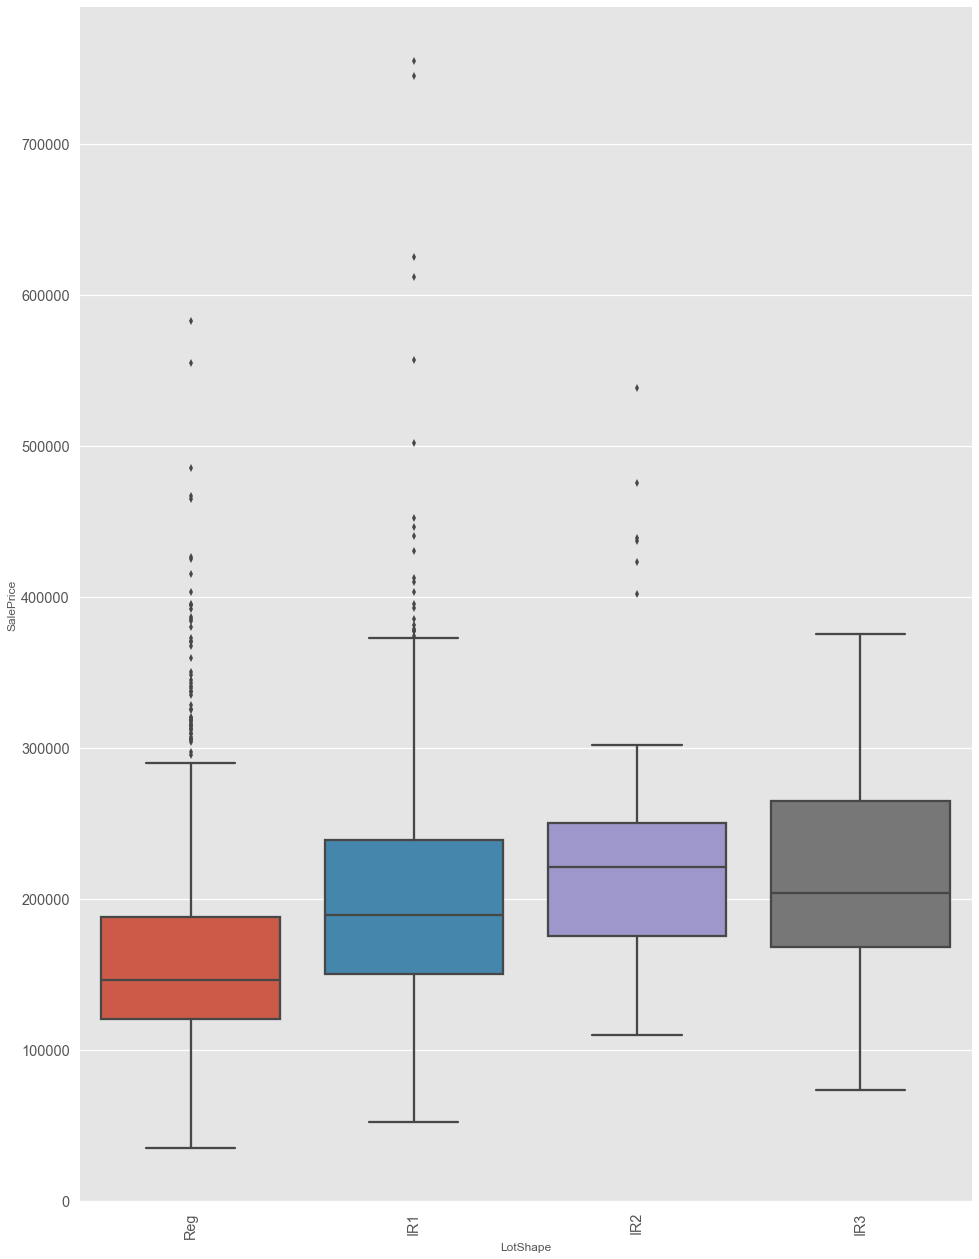

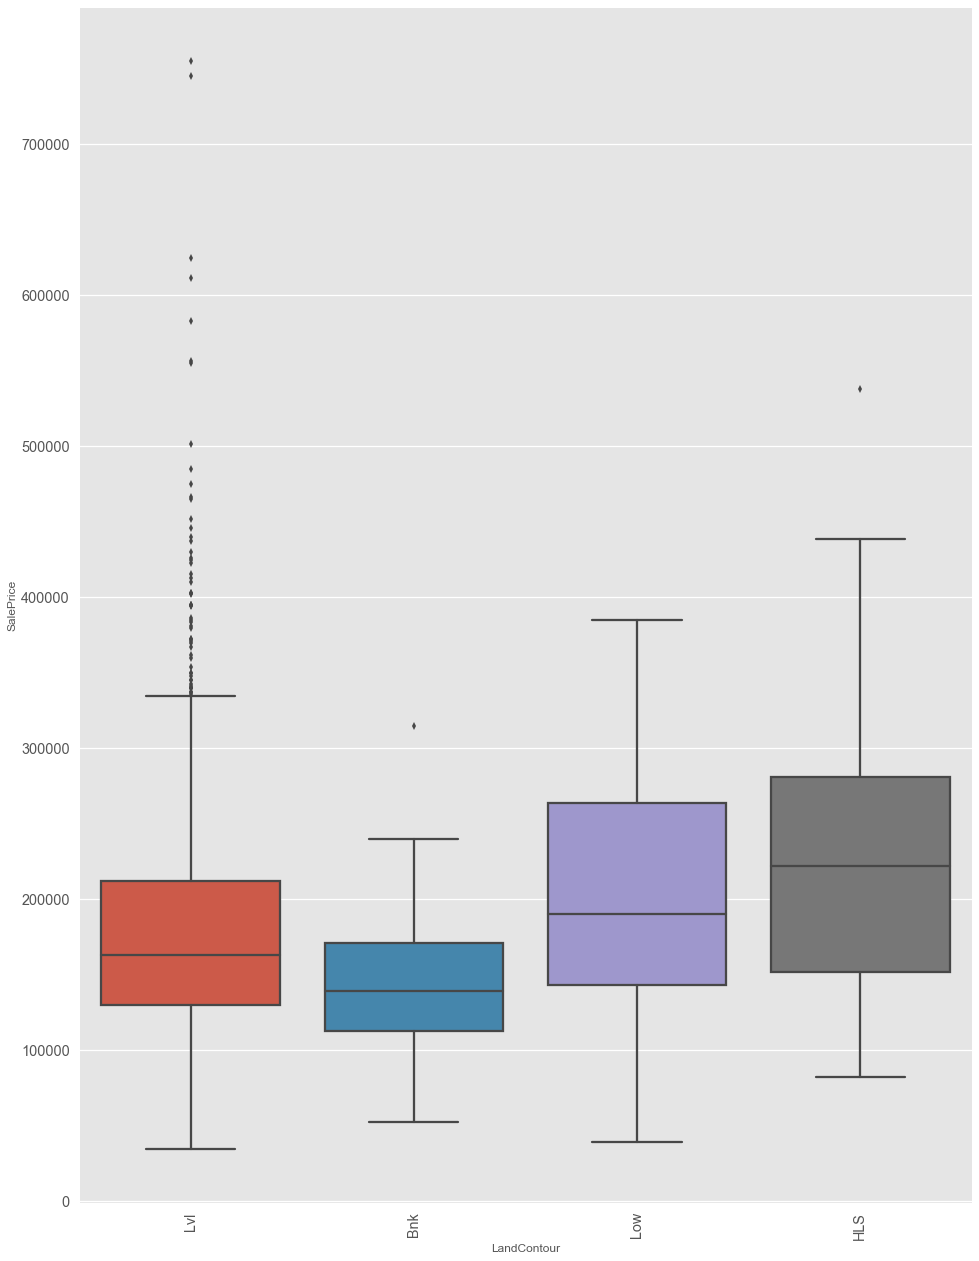

In [15]:
# Create categorical dataframe
cat_df = train.select_dtypes(include=['object'])

# Box plotting for 5 first categorical attributes
for cat in cat_df.dtypes[:5].index.values:
    plt.figure(figsize=(16, 22))
    plt.xticks(rotation=90)
    sn.boxplot(x=cat, y='SalePrice', data=train)    
    plt.show()

## Preprocessing & Feature Engineering
---

### Notes

**Preprocessing**

- Data cleaning
    + Deal missing numerical values
    + Deal missing categorical values
- Label encoding
    
**Feature Engineering**

- Add new feature about all floor square feet
- Add new feature about total bath room
- Add new feature about pool score

### Preprocessing

Deal with missing values by zero

In [16]:
train = train.replace([-np.inf, np.inf], 0.0)
train = train.fillna(0.0)

test = test.replace([-np.inf, np.inf], 0.0)
test = test.fillna(0.0)

Label Encoding

In [17]:
def label_encoding(df):
    cat_features = df.select_dtypes(include=['object']).columns

    lbl = LabelEncoder()

    for col in cat_features:
        lbl.fit(list(df[col].values.astype('str')))

    df[col] = lbl.transform(list(df[col].values.astype('str')))
    
    return df

In [18]:
train = label_encoding(train)
test = label_encoding(test)

### Feature Engineering

In [19]:
# All floor square feet = First floor square feet + Second floor square feet
train['AllFlrSF'] = np.log1p(train['1stFlrSF'] + train['2ndFlrSF'])
test['AllFlrSF'] = np.log1p(test['1stFlrSF'] + test['2ndFlrSF'])

# Total number of bathrooms
train['TotalBath'] = train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath']) + train["FullBath"] + (0.5 * train['HalfBath'])
test['TotalBath'] = test['BsmtFullBath'] + (0.5 * test['BsmtHalfBath']) + test["FullBath"] + (0.5 * test['HalfBath'])
    
# Overall pool score
train['PoolScore'] = train['PoolArea'] * train['PoolQC']
test['PoolScore'] = test['PoolArea'] * test['PoolQC']

## Baseline Machine Learning
---

In [20]:
y = np.log1p(train['SalePrice'])

ignore_cols = ['Id', 'SalePrice']
train_features = [col for col in train.select_dtypes(include=['float64', 'int64']).columns if col not in ignore_cols]

X = train[train_features].copy()

### Cross Validation

In [21]:
def rmse_cv(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

### Linear Regression Baseline

In [22]:
# Linear Regression estimator
clf = LinearRegression()

# Cross validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)
rmse = rmse_cv(clf, X_train, y_train)

print('Linear Regression Baseline')
print('RMSE mean {:.6f} - RMSE std {:.6f}'.format(rmse.mean(), rmse.std()))

Linear Regression Baseline
RMSE mean 0.151294 - RMSE std 0.028827


### Ridge Baseline

In [23]:
# Ridge estimator
clf = Ridge()

# Cross validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)
rmse = rmse_cv(clf, X_train, y_train)

print('Ridge Baseline')
print('RMSE mean {:.6f} - RMSE std {:.6f}'.format(rmse.mean(), rmse.std()))

Ridge Baseline
RMSE mean 0.151737 - RMSE std 0.030287


## Tuning Parameters
---

In [24]:
"""
Create grid_search class help to get the best parameters to improve the performace algorithms
"""
class grid_search():
    def __init__(self, model):
        self.model = model
    
    def grid_get(self, X, y, param_grid):
        grid_search = GridSearchCV(self.model, param_grid, cv=5, scoring="neg_mean_squared_error")
        grid_search.fit(X, y)
        print(grid_search.best_params_, np.sqrt(-grid_search.best_score_), '\n')
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print(pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score','std_test_score']])

In [25]:
# Hyperparameters tuning for Bayesian Ridge

spaces = []
spaces.append(('Ridge', Ridge(), {'alpha': [0.1, 0.5, 1.0, 3.0, 5.0]}))

for name, clf, param_grid in spaces:
    print(name)
    grid_search(clf).grid_get(X_train, y_train, param_grid)
    print('-------------------------------------------------')

Ridge
{'alpha': 0.1} 0.15412173738238008 

           params  mean_test_score  std_test_score
0  {'alpha': 0.1}         0.154122        0.009693
1  {'alpha': 0.5}         0.154403        0.009926
2  {'alpha': 1.0}         0.154772        0.010166
3  {'alpha': 3.0}         0.156132        0.010794
4  {'alpha': 5.0}         0.157170        0.011149
-------------------------------------------------


In [26]:
# Ridge estimator
clf = Ridge(alpha=0.1)

# Cross validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)
rmse = rmse_cv(clf, X_train, y_train)

print('Ridge Baseline')
print('RMSE mean {:.6f} - RMSE std {:.6f}'.format(rmse.mean(), rmse.std()))

Ridge Baseline
RMSE mean 0.151326 - RMSE std 0.029006


## Finalize Model
---

### Blend Models

In [27]:
class BlendModel(BaseEstimator, RegressorMixin):
    def __init__(self, model, weight):
        self.model = model
        self.weight = weight
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.model]
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self, X):
        w = list()
        pred = np.array([model.predict(X) for model in self.models_])
        # for every data point, single model prediction times weight, then add them together
        for data in range(pred.shape[1]):
            single = [pred[model,data]*weight for model, weight in zip(range(pred.shape[0]),self.weight)]
            w.append(np.sum(single))
        return w

In [28]:
lnr = LinearRegression()
ridge = Ridge(alpha=0.1)

clf_blend = BlendModel(model=[lnr, ridge], weight=[0.5, 0.5])

score_avg = rmse_cv(clf_blend, X_train, y_train) 

print('Blend Models')
print('mean {:.6f} - RMSE std {:.6f}'.format(score_avg.mean(), score_avg.std()))

Blend Models
mean 0.151309 - RMSE std 0.028917


Use blend model as a final model for fitting and predicting to get the results

In [29]:
clf_blend.fit(X_train, y_train)
y_train_pred = clf_blend.predict(X_train.values)
print(np.sqrt(mean_squared_error(y_train, y_train_pred)))

0.1366157381910738


In [30]:
X_test = test[train_features].copy()
test_pred = np.expm1(clf_blend.predict(X_test.values))

Quick look the SalePrice predicted

In [31]:
test_pred[:10]

array([114412.5128215 , 145689.04923819, 174880.38457392, 198998.87823882,
       181149.22833822, 178799.41514767, 200254.50390025, 170086.54047384,
       197840.80943262, 114722.82826662])